                                                    *** Progetto UAF ***

# Caricare e visualizzare i dati reali

Numero di immagini trovate: 10


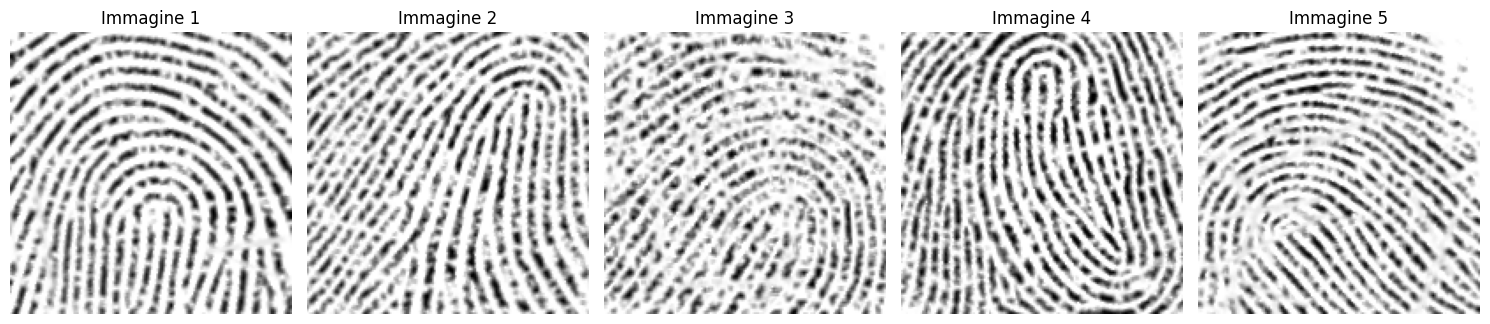

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

# Definisci il percorso alla cartella real_data
real_data_path = "/Users/giulia/Desktop/UAF_Project_DiMauroIsinelli/dataset_FVC2000_DB4_B/dataset/real_data"

# Recupera tutti i file immagine dalla cartella
image_files = [f for f in os.listdir(real_data_path) if f.endswith(('.bmp', '.png', '.jpg', '.jpeg'))]

# Controlla quante immagini ci sono
print(f"Numero di immagini trovate: {len(image_files)}")

# Mostra alcune immagini di esempio
num_images_to_show = 5  # Numero di immagini da visualizzare
fig, axes = plt.subplots(1, num_images_to_show, figsize=(15, 5))

for i in range(num_images_to_show):
    # Percorso completo dell'immagine
    img_path = os.path.join(real_data_path, image_files[i])
    
    # Carica l'immagine in scala di grigi
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    # Visualizza l'immagine
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Immagine {i+1}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Pre-processare i dati del training set

In [2]:
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

# Definisci il percorso della directory
train_data_dir = "/Users/giulia/Desktop/UAF_Project_DiMauroIsinelli/dataset_FVC2000_DB4_B/dataset/train_data"

# Lista per memorizzare le immagini pre-processate
processed_images = []
labels = []  # Qui puoi memorizzare le etichette per il training (ad esempio, 0 per una classe, 1 per un'altra, etc.)

# Funzione per pre-processare un'immagine
def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Carica immagine in scala di grigi
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)  # Converte l'immagine in 3 canali RGB
    img_resized = cv2.resize(img, (224, 224))  # Ridimensiona a 224x224
    img_normalized = img_resized / 255.0  # Normalizza i pixel tra 0 e 1
    return img_normalized

# Scorri tutte le immagini nella directory train_data
for filename in os.listdir(train_data_dir):
    img_path = os.path.join(train_data_dir, filename)
    
    # Verifica se è un file immagine (ad esempio .bmp, .jpg, .png)
    if filename.endswith(".bmp") or filename.endswith(".jpg") or filename.endswith(".png"):
        
        # Pre-processa l'immagine
        processed_img = preprocess_image(img_path)
        
        # Aggiungi l'immagine alla lista
        processed_images.append(processed_img)
        
        # Aggiungi la label (qui supponiamo che tu stia classificando per cartelle)
        # Ad esempio, se l'immagine è in una sottocartella, usa il nome della cartella come etichetta
        label = filename.split('_')[0]  # Un esempio di come potresti ottenere la label
        labels.append(int(label))

# Converto le liste in array NumPy
processed_images = np.array(processed_images)
labels = np.array(labels)

# Verifica la forma delle immagini e delle etichette
print(f"Forma delle immagini: {processed_images.shape}")
print(f"Forma delle etichette: {labels.shape}")

# Se le immagini sono in scala di grigi, puoi applicare un'ulteriore normalizzazione per VGG16
processed_images = preprocess_input(processed_images)

# Ora hai le immagini pre-processate e le etichette pronte per l'addestramento

Forma delle immagini: (800, 224, 224, 3)
Forma delle etichette: (800,)


# Caricamento e addestramento del modello VGG16

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Carica VGG16 pre-addestrato su ImageNet, senza il classificatore finale (include_top=False)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congela i layer di base per non modificarli durante l'addestramento
base_model.trainable = False

# Aggiungi nuovi layer per il riconoscimento delle impronte digitali
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # Numero di classi di impronte digitali (modifica a seconda del tuo dataset)
])

# Compila il modello
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Mostra il riepilogo del modello
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,250,250 (58.18 MB)

 Trainable params: 535,562 (2.04 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

## Addestriamo il modello sui dati pre-processati del training set

Immagini di training: (640, 224, 224, 3)
Immagini di validazione: (160, 224, 224, 3)
Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.1300 - loss: 2.6584 - val_accuracy: 0.2812 - val_loss: 2.0074
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.2062 - loss: 2.3038 - val_accuracy: 0.3187 - val_loss: 1.9150
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.2449 - loss: 2.0570 - val_accuracy: 0.2438 - val_loss: 1.9807
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.2582 - loss: 2.0189 - val_accuracy: 0.3688 - val_loss: 1.8559
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.2757 - loss: 1.9866 - val_accuracy: 0.2937 - val_loss: 1.7560
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.3405 - loss: 1.8373 - val_accuracy: 0.4062 - val_loss: 1.7191
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.3637 - loss: 1.7736 - val_accuracy: 0.4125 - val_loss: 1.6871
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━

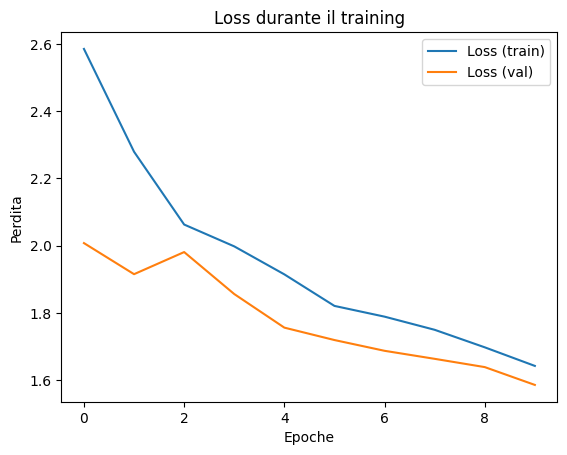

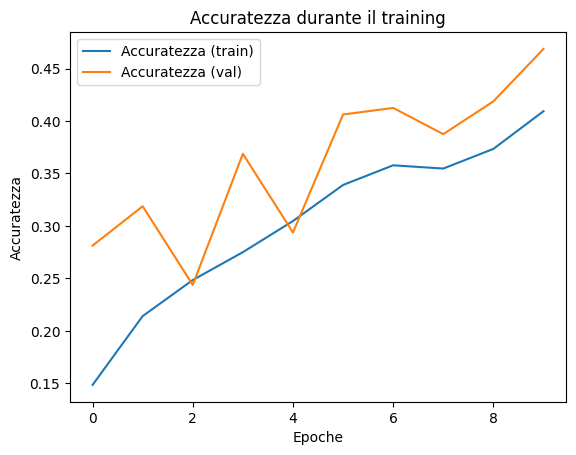

In [4]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Suddividi il dataset in training e validazione (80% training, 20% validazione)
X_train, X_val, y_train, y_val = train_test_split(processed_images, labels, test_size=0.2, random_state=42)

# Verifica la forma delle variabili
print(f"Immagini di training: {X_train.shape}")
print(f"Immagini di validazione: {X_val.shape}")

# Addestramento del modello
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Salva il modello addestrato
model.save("vgg16_fingerprint_model.h5")

# osserviamo accuratezza e perdita durante addestramento
# Plot della perdita
plt.plot(history.history['loss'], label='Loss (train)')
plt.plot(history.history['val_loss'], label='Loss (val)')
plt.title('Loss durante il training')
plt.xlabel('Epoche')
plt.ylabel('Perdita')
plt.legend()
plt.show()

# Plot dell'accuratezza
plt.plot(history.history['accuracy'], label='Accuratezza (train)')
plt.plot(history.history['val_accuracy'], label='Accuratezza (val)')
plt.title('Accuratezza durante il training')
plt.xlabel('Epoche')
plt.ylabel('Accuratezza')
plt.legend()
plt.show()


## Confusion Matrix

5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step


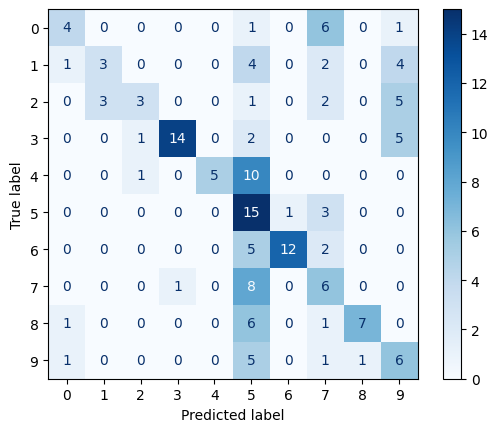

Accuratezza: 46.88%
Precisione: 0.64
Recall: 0.47
F1-Score: 0.49


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# Fai le previsioni con il modello
predictions = model.predict(X_val)

# Calcola le classi predette
predicted_classes = np.argmax(predictions, axis=1)

# Calcola la confusion matrix
cm = confusion_matrix(y_val, predicted_classes)

# Visualizza la confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')  # Usa la mappa di colori 'Blues'
plt.show()

# Calcola accuratezza, precisione, recall e F1-score
accuracy = accuracy_score(y_val, predicted_classes)
precision = precision_score(y_val, predicted_classes, average='weighted')
recall = recall_score(y_val, predicted_classes, average='weighted')
f1 = f1_score(y_val, predicted_classes, average='weighted')

print(f"Accuratezza: {accuracy * 100:.2f}%")
print(f"Precisione: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

## Curva ROC

5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step


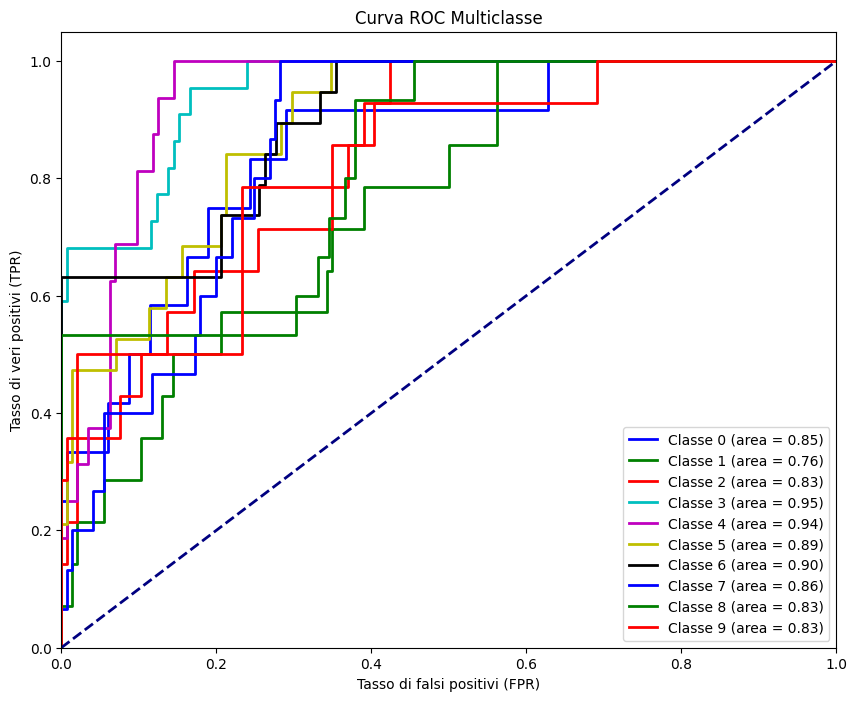

In [18]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Calcolare le probabilità per ciascuna classe
y_prob = model.predict(X_val)  # Le probabilità per ogni classe

# Binarizzare le etichette per la classificazione multiclasse
y_val_bin = label_binarize(y_val, classes=np.unique(y_val))  # Etichette binarizzate per la multi-classe

# Calcolare la curva ROC per ogni classe
n_classes = y_val_bin.shape[1]
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_prob[:, i])  # Calcola ROC per ciascuna classe
    roc_auc[i] = auc(fpr[i], tpr[i])  # Calcola AUC per ciascuna curva ROC

# Visualizzare la curva ROC per tutte le classi
plt.figure(figsize=(10, 8))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Colori per ciascuna classe (adatta se hai più classi)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i % len(colors)], lw=2, label=f'Classe {i} (area = {roc_auc[i]:.2f})')

# Plot la linea diagonale
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Aggiungi etichette e legenda
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasso di falsi positivi (FPR)')
plt.ylabel('Tasso di veri positivi (TPR)')
plt.title('Curva ROC Multiclasse')
plt.legend(loc='lower right')

# Mostra il grafico
plt.show()

## Distribuzione predizioni per ogni classe

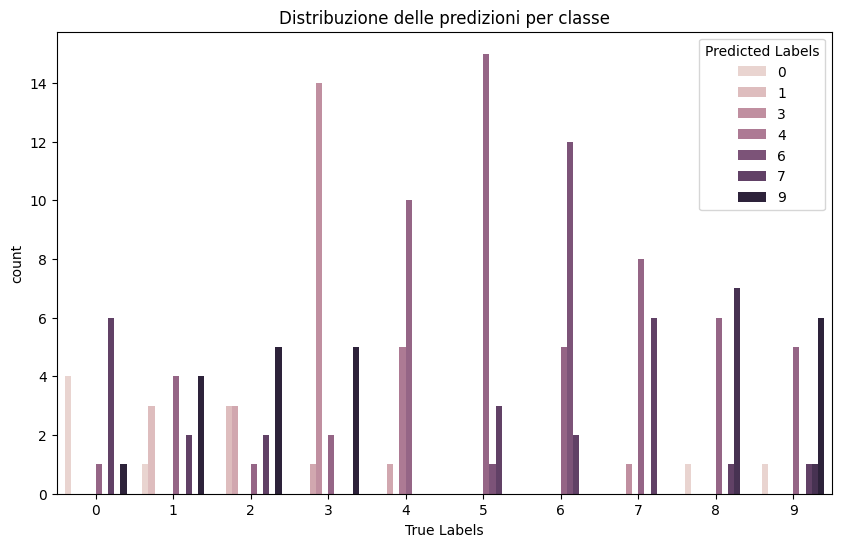

In [16]:
import seaborn as sns
import pandas as pd

# Crea un DataFrame per le etichette vere e predette
df = pd.DataFrame({'True Labels': y_val, 'Predicted Labels': predicted_classes})

# Visualizza una tabella o grafico a barre per vedere la distribuzione
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="True Labels", hue="Predicted Labels")
plt.title("Distribuzione delle predizioni per classe")
plt.show()

# Benchmarking

## Carichiamo e addestriamo sul nostro set di dati il modello pre-addestrato ResNet50

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.1022 - loss: 14.2992 - val_accuracy: 0.0875 - val_loss: 3.7348
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.1091 - loss: 4.0650 - val_accuracy: 0.0875 - val_loss: 2.6177
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.1096 - loss: 2.7811 - val_accuracy: 0.1187 - val_loss: 2.7836
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 992ms/step - accuracy: 0.1099 - loss: 2.7056 - val_accuracy: 0.0875 - val_loss: 2.6488
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 976ms/step - accuracy: 0.1039 - loss: 2.6411 - val_accuracy: 0.1187 - val_loss: 2.5151
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 961ms/step - accuracy: 0.0851 - loss: 2.6956 - val_accuracy: 0.0875 - val_loss: 2.7673
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 952ms/step - accuracy: 0.1151 - loss: 2.6212 - val_accuracy: 0.1000 - val_loss: 2.4766
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 946ms/step - accuracy: 0.0911 - loss: 2.4535 - val_accuracy: 0.

Test loss: 2.603135347366333
Test accuracy: 0.09375


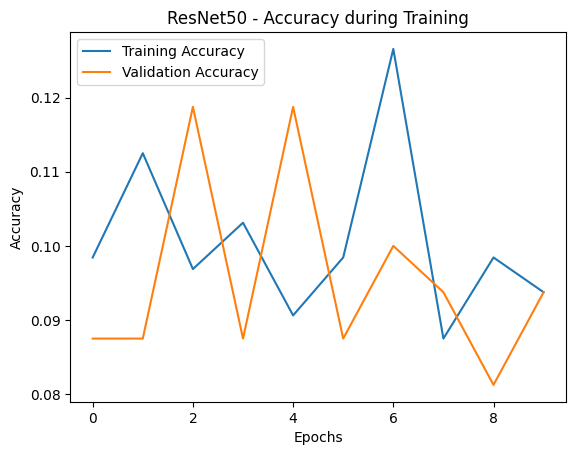

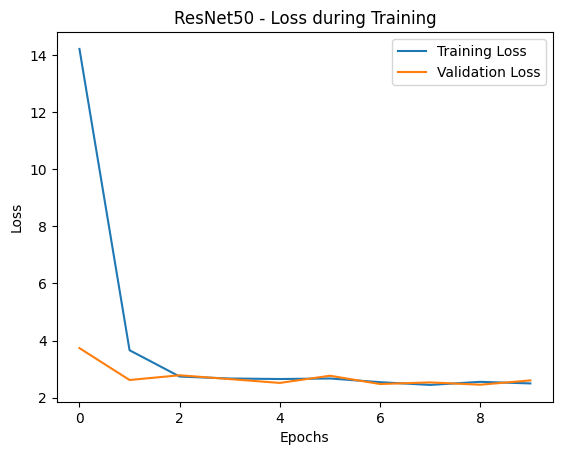

In [28]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet50 import preprocess_input

# Carica ResNet50 pre-addestrato su ImageNet, escludendo la parte superiore (head)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Aggiungi il livello di pooling globale e la parte superiore del tuo modello
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(10, activation='softmax')(x)  # Usa il numero di classi del tuo dataset

# Trasforma le etichette in formato one-hot
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_val_one_hot = to_categorical(y_val, num_classes=10)

# Costruisci il modello
model = Model(inputs=base_model.input, outputs=x)

# Congela i pesi del modello pre-addestrato
for layer in base_model.layers:
    layer.trainable = False

# Compila il modello
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Pre-processa le immagini
X_train_resnet50 = preprocess_input(X_train)
X_val_resnet50 = preprocess_input(X_val)

# Addestra il modello
history_resnet50 = model.fit(X_train_resnet50, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_val_resnet50, y_val_one_hot))

# Salva il modello addestrato
model.save("resnet50_fingerprint_model.h5")

# Valuta il modello sui dati di validazione
score = model.evaluate(X_val_resnet50, y_val_one_hot, verbose=0)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

# Visualizza l'accuratezza del modello durante l'addestramento
plt.plot(history_resnet50.history['accuracy'], label='Training Accuracy')
plt.plot(history_resnet50.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('ResNet50 - Accuracy during Training')
plt.show()

# Visualizza la loss del modello durante l'addestramento
plt.plot(history_resnet50.history['loss'], label='Training Loss')
plt.plot(history_resnet50.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('ResNet50 - Loss during Training')
plt.show()

## Confusion matrix

## Curva ROC

## Confronto fra VGG16 e ResNet50

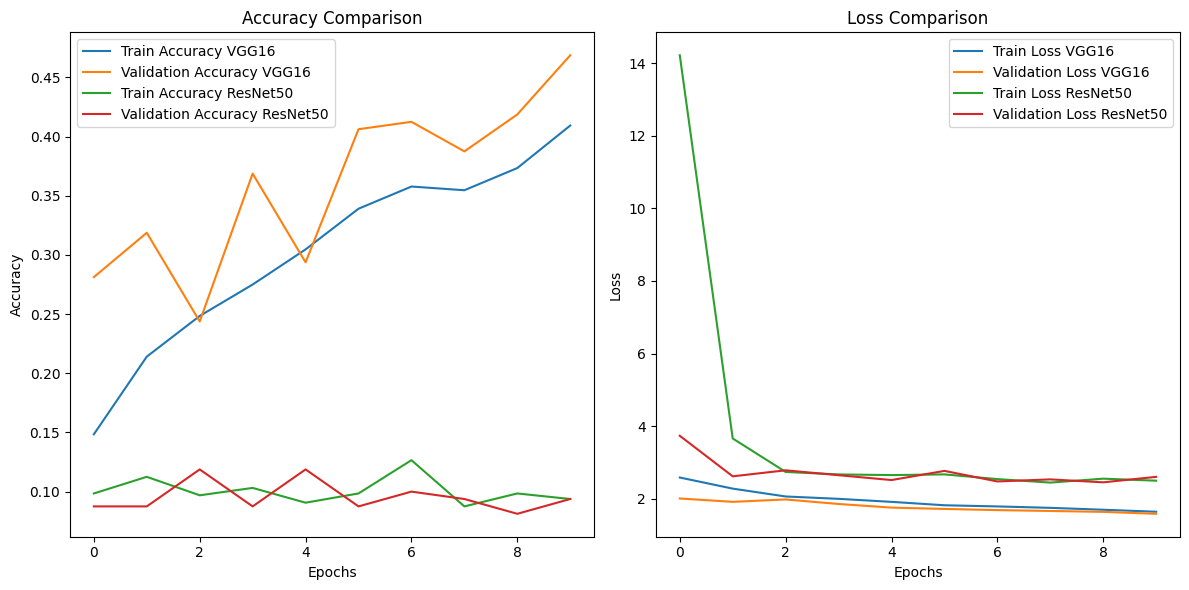

In [30]:
import matplotlib.pyplot as plt

# Plot dell'accuratezza
plt.figure(figsize=(12, 6))

# Accuratezza per VGG16
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy VGG16')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy VGG16')
plt.plot(history_resnet50.history['accuracy'], label='Train Accuracy ResNet50')
plt.plot(history_resnet50.history['val_accuracy'], label='Validation Accuracy ResNet50')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot della perdita
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss VGG16')
plt.plot(history.history['val_loss'], label='Validation Loss VGG16')
plt.plot(history_resnet50.history['loss'], label='Train Loss ResNet50')
plt.plot(history_resnet50.history['val_loss'], label='Validation Loss ResNet50')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()